In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import h5py
from xpcs_viewer import XpcsFile as XF
from xpcs_viewer.module import average_toolbox
import sys
sys.path.append('../figure2')
from utils import (split, average_datasets, read_keys_from_files, read_temperature_from_files, outlier_removal,
read_keys_from_files_parallel, average_datasets_without_outlier_parallel)
import logging
import tqdm

In [2]:
logger = logging.getLogger(__name__)

In [3]:
def process_group(group='B039', num_sections=10,
                  prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis'):
    # read file list in the folder
    flist = glob.glob(os.path.join(prefix, f'{group}*.hdf'))
    flist.sort()
    logger.info(f'total number of files in {group}  is {len(flist)}')
    
    # get the temperature
    temperature_list = read_temperature_from_files(flist, zone_idx=2)
    
    flist_sections = split(flist, num_sections)
    idx_sections = split(np.arange(len(flist)), num_sections)
    
    # read main field for averag
    data_dict_all = read_keys_from_files_parallel(flist_sections)
    
    # fig, ax = plt.subplots(1, 1)
    # for n, sub_list in enumerate(idx_sections):
    #     ax.plot(sub_list, temperature_list[sub_list], 'o', label=f'{n}')
    # plt.legend()
    
    # do outlier removal and average
    args = [(data_dict_all[n], f'{group}_section_{n:02d}') for n in range(num_sections)]
    avg_all = average_datasets_without_outlier_parallel(args)
    # mask = outlier_removal(data_dict, label=f'{group}_section_{n:02d}', percentile=5)
    # avg_dict = average_datasets(data_dict=data_dict, mask=mask)
    
    
    for n, avg_dict in enumerate(avg_all):
        avg_dict['temperature'] = temperature_list[idx_sections[n]]
        avg_dict['temperature_x'] = idx_sections[n]
    
    # get additonal field for plotting
    axf = XF(flist[0])
    t_el = axf.t_el
    ql_dyn = axf.ql_dyn
    ql_sta = axf.ql_sta
    return avg_all, t_el, ql_dyn, ql_sta



In [4]:
# get normalized data
# norm_prefix = '/home/8ididata/2022-1/babnigg202203/cluster_results'
# norm_data_list = glob.glob(os.path.join(norm_prefix, 'E0110_S3_4_Ramp_340C10p_att00_Rq*hdf'))
# print(len(norm_data_list))

In [5]:
avg_110, t_el, ql_dyn, ql_sta = process_group('E0110', prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis')

2023-10-27 18:11:43,644 __main__                : total number of files in E0110  is 1198
2023-10-27 18:11:47,487 xpcs_viewer.fileIO.hdf_reader: key not found: /exchange/partition-mean-total
2023-10-27 18:11:47,652 xpcs_viewer.fileIO.hdf_reader: key not found: /exchange/partition-mean-total
2023-10-27 18:11:50,036 utils                   : label='E0110_section_04': remove 14 datasets out of 118
2023-10-27 18:11:50,042 utils                   : label='E0110_section_09': remove 13 datasets out of 119
2023-10-27 18:11:50,043 utils                   : label='E0110_section_08': remove 15 datasets out of 119
2023-10-27 18:11:50,045 utils                   : label='E0110_section_01': remove 13 datasets out of 120
2023-10-27 18:11:50,047 utils                   : label='E0110_section_00': remove 17 datasets out of 120
2023-10-27 18:11:50,049 utils                   : label='E0110_section_03': remove 15 datasets out of 120
2023-10-27 18:11:50,050 utils                   : label='E0110_section_0

In [6]:
avg_111, _, _, _ = process_group('E0111', prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis')

2023-10-27 18:11:50,897 __main__                : total number of files in E0111  is 1197
2023-10-27 18:11:58,687 utils                   : label='E0111_section_07': remove 15 datasets out of 119
2023-10-27 18:11:58,688 utils                   : label='E0111_section_08': remove 17 datasets out of 119
2023-10-27 18:11:58,690 utils                   : label='E0111_section_09': remove 17 datasets out of 119
2023-10-27 18:11:58,690 utils                   : label='E0111_section_03': remove 14 datasets out of 120
2023-10-27 18:11:58,690 utils                   : label='E0111_section_06': remove 15 datasets out of 120
2023-10-27 18:11:58,691 utils                   : label='E0111_section_02': remove 15 datasets out of 120
2023-10-27 18:11:58,691 utils                   : label='E0111_section_00': remove 14 datasets out of 120
2023-10-27 18:11:58,692 utils                   : label='E0111_section_05': remove 16 datasets out of 120
2023-10-27 18:11:58,692 utils                   : label='E0111

In [7]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300

2023-10-27 18:11:59,757 matplotlib.mathtext     : Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
2023-10-27 18:11:59,759 matplotlib.mathtext     : Substituting symbol − from STIXGeneral
2023-10-27 18:11:59,761 matplotlib.mathtext     : Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
2023-10-27 18:11:59,761 matplotlib.mathtext     : Substituting symbol − from STIXGeneral
2023-10-27 18:11:59,819 matplotlib.mathtext     : Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
2023-10-27 18:11:59,820 matplotlib.mathtext     : Substituting symbol − from STIXGeneral
2023-10-27 18:11:59,821 matplotlib.mathtext     : Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
2023-10-27 18:11:59,822 matplotlib.mathtext     : Substituting symbol − from STIXGeneral
2023-10-27 18:11:59,823 matplotlib.mathtext     : Font 'default' doe

2023-10-27 18:12:00,617 fontTools.subset        : Glyph IDs:   [0, 1, 2, 3, 5, 13, 14, 19, 21, 22, 23, 24, 25, 26, 27, 40, 46, 57, 70, 72, 74, 76, 78, 82, 85, 86, 87, 88, 89, 90]
2023-10-27 18:12:00,617 fontTools.subset        : Retaining 30 glyphs
2023-10-27 18:12:00,617 fontTools.subset        : head subsetting not needed
2023-10-27 18:12:00,618 fontTools.subset        : hhea subsetting not needed
2023-10-27 18:12:00,618 fontTools.subset        : maxp subsetting not needed
2023-10-27 18:12:00,618 fontTools.subset        : OS/2 subsetting not needed
2023-10-27 18:12:00,619 fontTools.subset        : hmtx subsetted
2023-10-27 18:12:00,619 fontTools.subset        : cmap subsetted
2023-10-27 18:12:00,619 fontTools.subset        : fpgm subsetting not needed
2023-10-27 18:12:00,620 fontTools.subset        : prep subsetting not needed
2023-10-27 18:12:00,620 fontTools.subset        : cvt  subsetting not needed
2023-10-27 18:12:00,620 fontTools.subset        : loca subsetting not needed
2023-

2023-10-27 18:12:00,714 fontTools.subset        : Retaining 8 glyphs
2023-10-27 18:12:00,715 fontTools.subset        : head subsetting not needed
2023-10-27 18:12:00,715 fontTools.subset        : hhea subsetting not needed
2023-10-27 18:12:00,716 fontTools.subset        : maxp subsetting not needed
2023-10-27 18:12:00,716 fontTools.subset        : OS/2 subsetting not needed
2023-10-27 18:12:00,719 fontTools.subset        : hmtx subsetted
2023-10-27 18:12:00,721 fontTools.subset        : cmap subsetted
2023-10-27 18:12:00,721 fontTools.subset        : fpgm subsetting not needed
2023-10-27 18:12:00,721 fontTools.subset        : prep subsetting not needed
2023-10-27 18:12:00,721 fontTools.subset        : cvt  subsetting not needed
2023-10-27 18:12:00,722 fontTools.subset        : loca subsetting not needed
2023-10-27 18:12:00,722 fontTools.subset        : post subsetted
2023-10-27 18:12:00,722 fontTools.subset        : gasp subsetting not needed
2023-10-27 18:12:00,724 fontTools.subset   

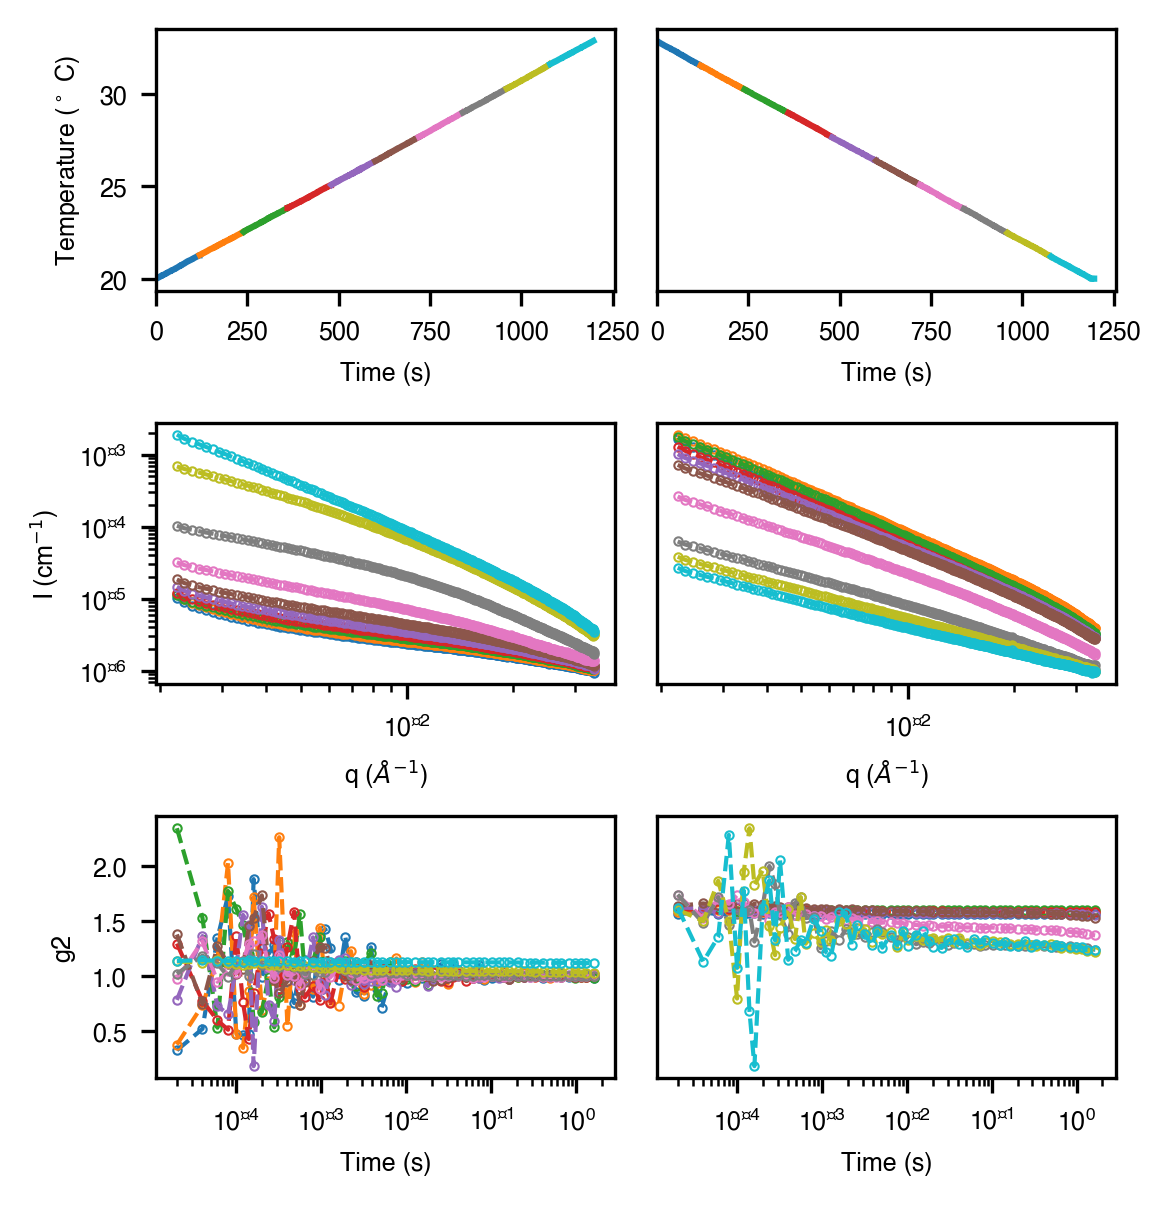

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(3.8, 4))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)

def plot_one_column(ax, avg_data_list, omit_ylabel=False):
    for avg_dict in avg_data_list:
        x = avg_dict['temperature'] * 4.0  # how to convert index to time (seconds)?
        ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'])
        
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
        
        # x = np.
        ax[2].plot(t_el, avg_dict['g2'][:, 1], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
    
    ax[0].set_xlabel('Time (s)')
    ax[1].set_xlabel('q ($\\AA^{-1}$)')
    ax[2].set_xlabel('Time (s)')
    
    if not omit_ylabel:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')
        
plot_one_column(ax[:, 0], avg_110)
plot_one_column(ax[:, 1], avg_111, omit_ylabel=True)
 

plt.subplots_adjust(wspace=0)
plt.savefig('figure3.png', dpi=300)
plt.savefig('figure3.pdf')
plt.tight_layout()